In [4]:
import numpy as np
import math
import matplotlib.pyplot as plt

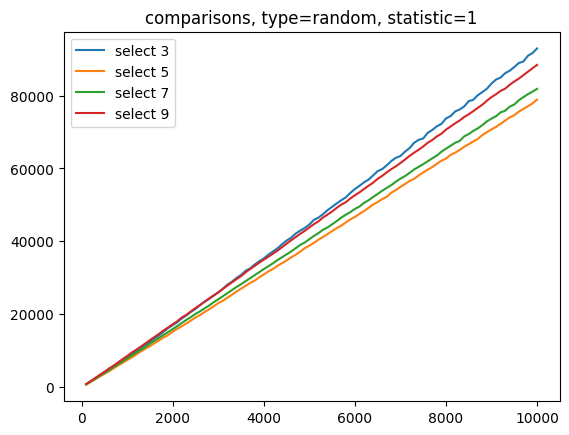

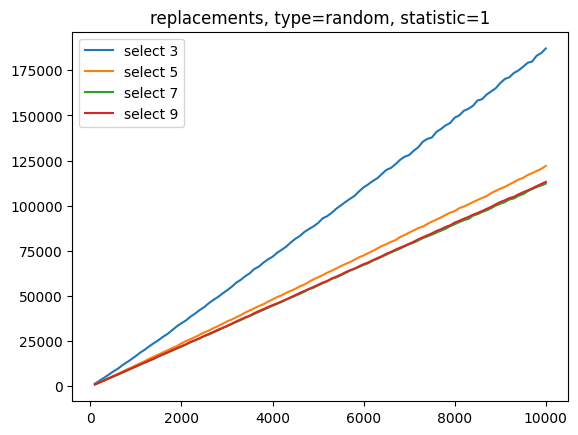

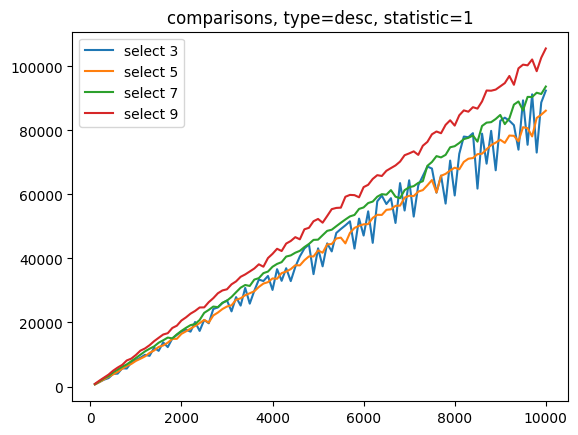

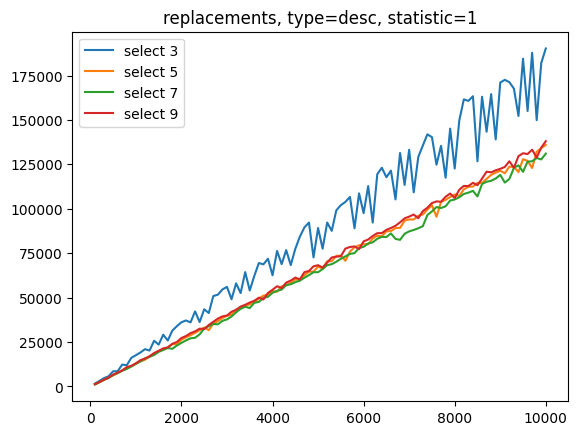

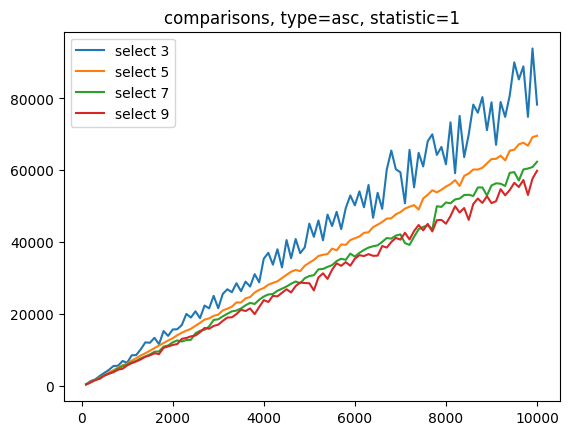

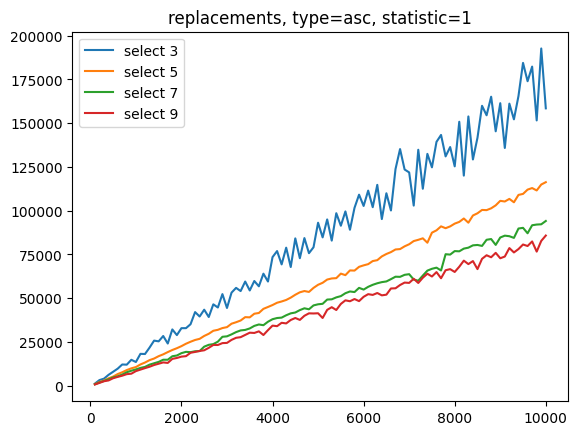

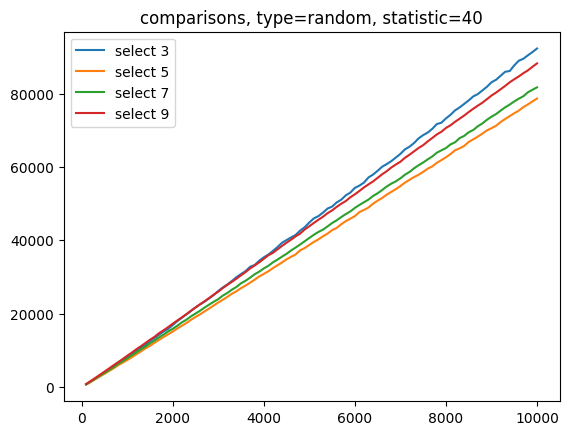

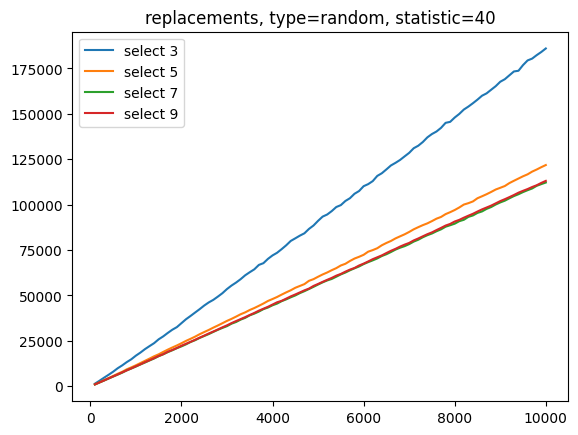

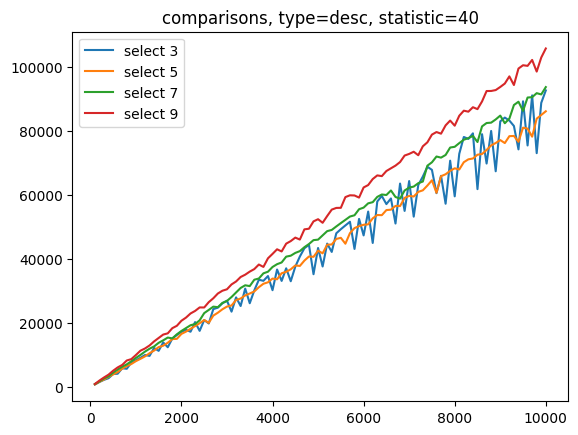

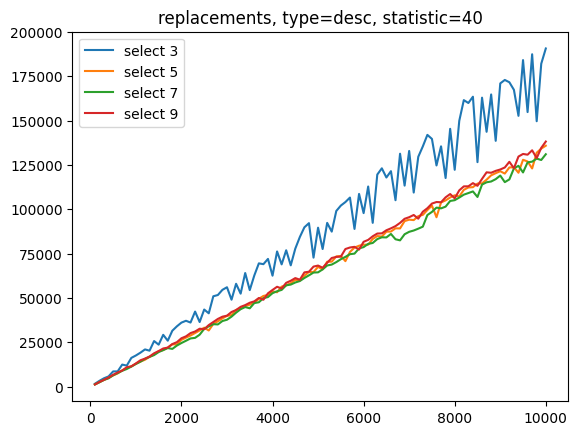

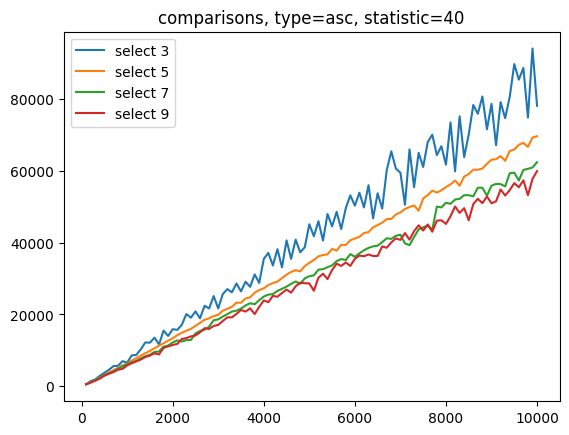

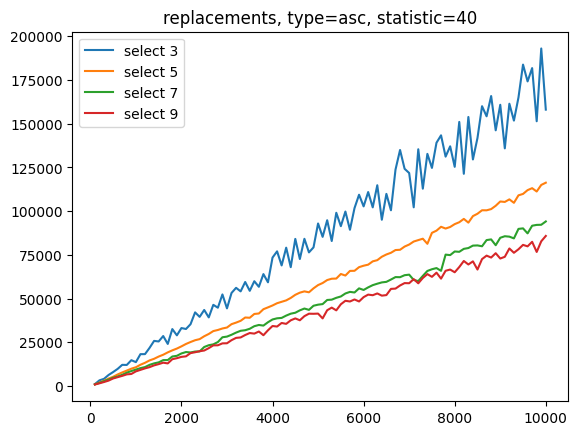

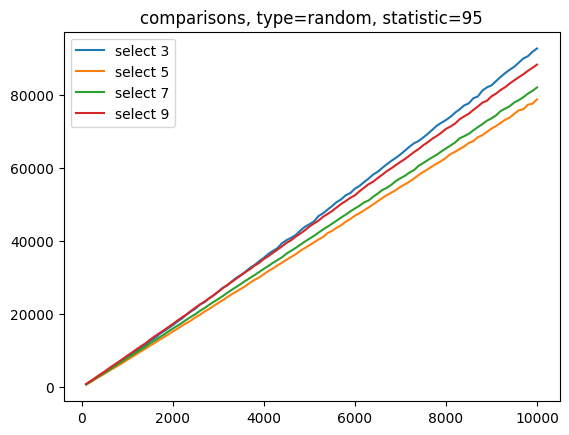

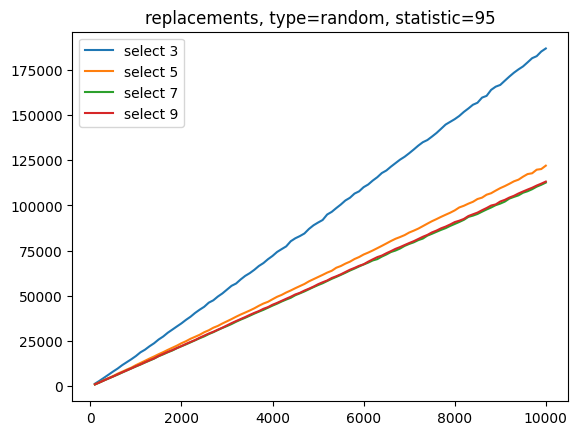

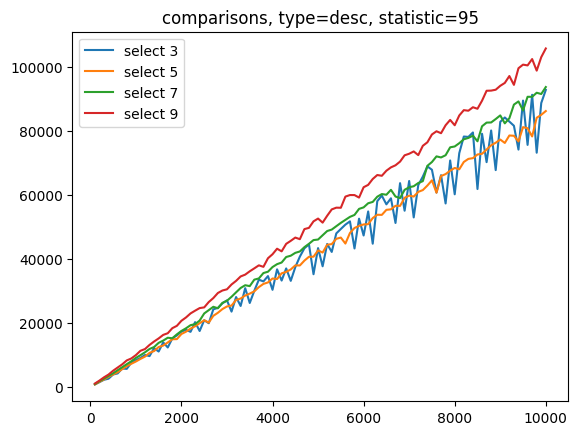

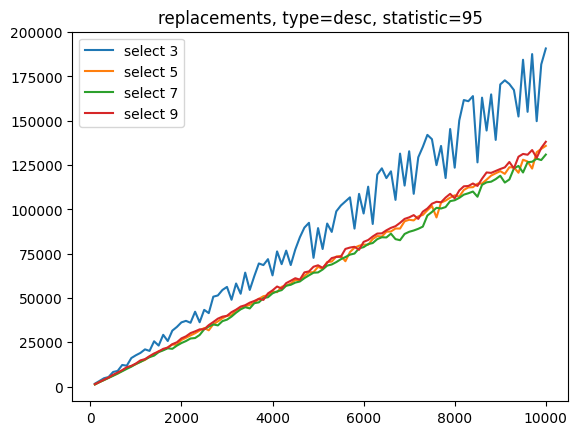

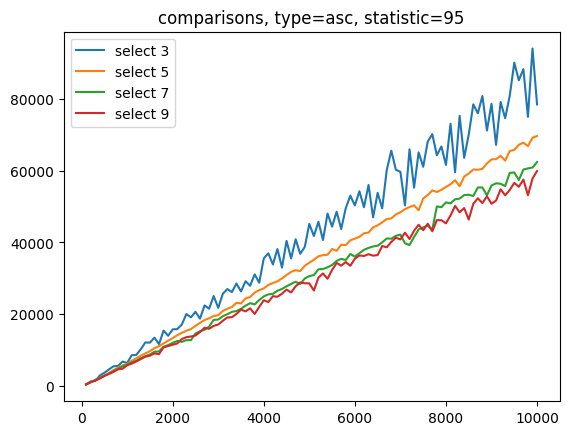

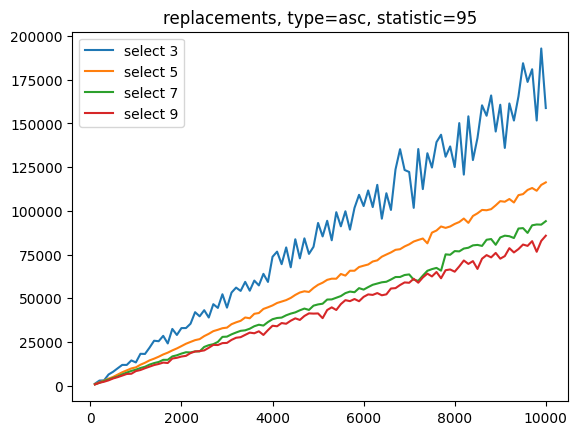

In [6]:
data_begin = 100                                            # beginning of data range
data_end = 10000                                            # end of data range (inclusive)
data_step = 100                                             # data range step
data_range = np.arange(data_begin, data_end + 1, data_step) # array of data values
data_size = len(data_range)                                 # length of the data values array

div_range = [3, 5, 7, 9]

m = 100 # number of repeats for a single experiment

for k in [1, 40, 95]: # positional statistic value

    for t in ["random", "desc", "asc"]: # type of the input data

        select_comparisons = np.zeros((4, data_size), int)
        select_replacements = np.zeros((4, data_size), int)
        
        for d in range(len(div_range)): # division size

            for n in data_range: # size of the input

                # read results and sum them

                select_data = open(f"results/select_{div_range[d]}_{t}_{k}_{n}.txt", "r")
                for result in select_data.readlines():
                    result_split = result.rstrip("\n").split(" ")
                    result_split = [eval(i) for i in result_split]
                    select_comparisons[d][n // data_step - 1] += result_split[0]
                    select_replacements[d][n // data_step - 1] += result_split[1]

        # take the average

        for d in range(len(div_range)):
            select_comparisons[d] = select_comparisons[d] / m
            select_replacements[d] = select_replacements[d] / m

        # plot the averages

        for d in range(len(div_range)):
            plt.plot(data_range, select_comparisons[d], label=f"select {div_range[d]}")
        plt.title(f"comparisons, type={t}, statistic={k}")
        plt.legend()
        plt.show()
        for d in range(len(div_range)):
            plt.plot(data_range, select_replacements[d], label=f"select {div_range[d]}")
        plt.title(f"replacements, type={t}, statistic={k}")
        plt.legend()
        plt.show()
